In [7]:
import pandas as pd
import numpy as np
import pdb 
from datetime import datetime, timedelta
from dis import dis
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("prepped_data.csv")
data_Alex = pd.read_csv("prepped_data_with_lpips_alex_similarity.csv")

In [8]:
data_per_image = data.groupby(['origin']).mean()
data_per_image = data_per_image.sort_values(by=["score"])

# For malginant and benign images each
images = np.unique(data['origin'])

image_class = []
for i in images:
    tmp_label = data.loc[data['origin'] == i]['current_correct_answer'].iloc[0]
    image_class.append(tmp_label)
    
sort_by_image_id = data_per_image.sort_index()[:len(images)] #sort images by image name
sort_by_image_id['class'] = image_class

# retrieve melanoma and nevus images
melanoma = sort_by_image_id.loc[sort_by_image_id['class']=="['melanoma']"]
nevus = sort_by_image_id.loc[sort_by_image_id['class']=="['nevus']"]

#sort nevus descending and turn negative, melanoma ascending
melanoma.sort_values(by=["score"], inplace = True)
nevus.sort_values(by=["score"], ascending = False, inplace = True)
nevus  = nevus*-1
combined_images = nevus.append(melanoma)

In [9]:
malignancy = combined_images['score']
data['malignancy'] = np.nan

for i,n in enumerate(malignancy.index):
    data['malignancy'][data['origin']==n] = malignancy.values[i]   

In [10]:
candidates = list(data[(data['malignancy']>-50) & (data['malignancy']<50)]['index'])
data_Alex_filtered = data_Alex.loc[data_Alex['index'].isin(candidates)]

In [11]:
similarity_1forward_max = data_Alex_filtered['similarity_1back'].max()
similarity_1forward_min = data_Alex_filtered['similarity_1forward'].min()
print(similarity_1forward_max,similarity_1forward_min)

data_Alex_filtered['similarity_bins_1back'] = pd.cut(x=data_Alex_filtered['similarity_1back'], bins=np.arange(0.3, 0.70, 0.02))
data_Alex_filtered['similarity_bins_1forward'] = pd.cut(x=data_Alex_filtered['similarity_1forward'], bins=np.arange(0.3, 0.70, 0.02))
data_per_bin_b = data_Alex_filtered.groupby(['similarity_bins_1back']).mean()
data_per_bin_f = data_Alex_filtered.groupby(['similarity_bins_1forward']).mean()
data_per_bin_b

0.7684 0.0


,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,RT,1back_accuracy,2back_accuracy,3back_accuracy,1forward_accuracy,similarity_1back,similarity_1forward
similarity_bins_1back,,,,,,,,,,,,,
"(0.3, 0.32]",378621.990163,380391.503689,380494.914509,381825.142196,42212.247215,33.227253,1.544836,0.514249,0.506003,0.494575,0.490380,0.310272,0.354421
"(0.32, 0.34]",372426.049130,374157.500000,371226.853889,372533.933854,41763.544524,33.674514,1.533048,0.513434,0.487206,0.495138,0.487845,0.330234,0.361622
"(0.34, 0.36]",374762.768381,376512.280226,378198.625506,379521.159077,41850.943906,32.551860,1.508354,0.502271,0.509758,0.490487,0.490610,0.349943,0.366599
"(0.36, 0.38]",370262.357653,371985.392982,372308.890623,373616.460012,41692.961645,32.534785,1.533875,0.489655,0.497520,0.491954,0.484211,0.369952,0.375011
"(0.38, 0.4]",375324.216199,377075.858605,376859.940612,378179.947309,42025.250442,32.183472,1.525914,0.495957,0.494693,0.490397,0.484205,0.389910,0.381870
"(0.4, 0.42]",373429.527555,375168.616727,378267.688175,379593.469676,41807.882443,32.345611,1.478485,0.500415,0.502631,0.497092,0.485600,0.409871,0.390363
"(0.42, 0.44]",374173.155653,375918.391795,376427.104604,377746.741309,41826.786564,33.542123,1.550942,0.487473,0.488569,0.488725,0.479956,0.429822,0.396948
"(0.44, 0.46]",373072.843430,374809.557502,377413.635974,378733.127307,41832.909226,31.425909,1.530400,0.480522,0.486673,0.488910,0.478472,0.449718,0.405872
"(0.46, 0.48]",378306.979644,380071.086804,378291.976837,379618.978708,42202.862424,32.054282,1.504004,0.467478,0.488301,0.491811,0.492981,0.469736,0.414126


In [12]:
data_per_bin_b1 = data_Alex_filtered.groupby(['similarity_bins_1back']).count()
data_per_bin_f1 = data_Alex_filtered.groupby(['similarity_bins_1forward']).count()
data_per_bin_b1

,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,current_labeling_state,response_submitted_at,problem_appeared_at,origin,...,3back_accuracy,1forward_accuracy,origin_file,shifted_origin_1back,shifted_origin_file_1back,shifted_origin_1forward,shifted_origin_file_1forward,similarity_1back,similarity_1forward,similarity_bins_1forward
similarity_bins_1back,,,,,,,,,,,,,,,,,,,,,
"(0.3, 0.32]",6913,6913,6913,6913,6913,6913,6913,6913,6913,6913,...,6913,6913,6913,6913,6913,6913,6913,6913,6913,5196
"(0.32, 0.34]",7816,7816,7816,7816,7816,7816,7816,7816,7816,7816,...,7816,7816,7816,7816,7816,7816,7816,7816,7816,6099
"(0.34, 0.36]",8147,8147,8147,8147,8147,8147,8147,8147,8147,8147,...,8147,8147,8147,8147,8147,8147,8147,8147,8147,6575
"(0.36, 0.38]",8265,8265,8265,8265,8265,8265,8265,8265,8265,8265,...,8265,8265,8265,8265,8265,8265,8265,8265,8265,6940
"(0.38, 0.4]",7914,7914,7914,7914,7914,7914,7914,7914,7914,7914,...,7914,7914,7914,7914,7914,7914,7914,7914,7914,6768
"(0.4, 0.42]",7222,7222,7222,7222,7222,7222,7222,7222,7222,7222,...,7222,7222,7222,7222,7222,7222,7222,7222,7222,6279
"(0.42, 0.44]",6386,6386,6386,6386,6386,6386,6386,6386,6386,6386,...,6386,6386,6386,6386,6386,6386,6386,6386,6386,5650
"(0.44, 0.46]",5365,5365,5365,5365,5365,5365,5365,5365,5365,5365,...,5365,5365,5365,5365,5365,5365,5365,5365,5365,4830
"(0.46, 0.48]",4274,4274,4274,4274,4274,4274,4274,4274,4274,4274,...,4274,4274,4274,4274,4274,4274,4274,4274,4274,3870


<Figure size 432x288 with 0 Axes>

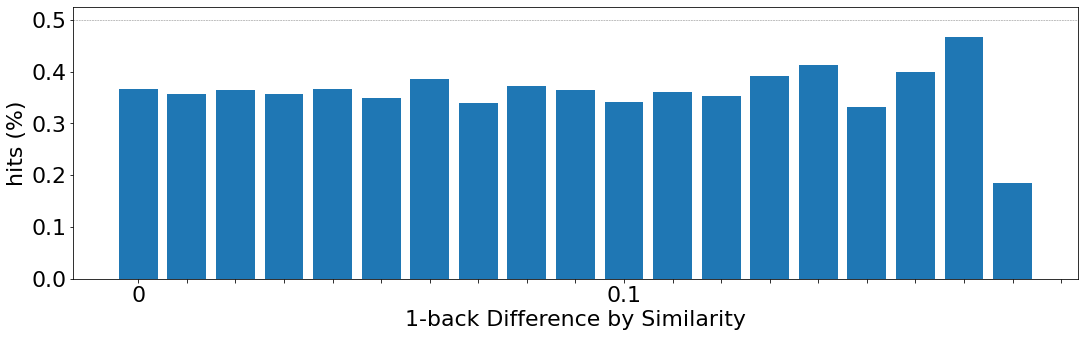

<Figure size 432x288 with 0 Axes>

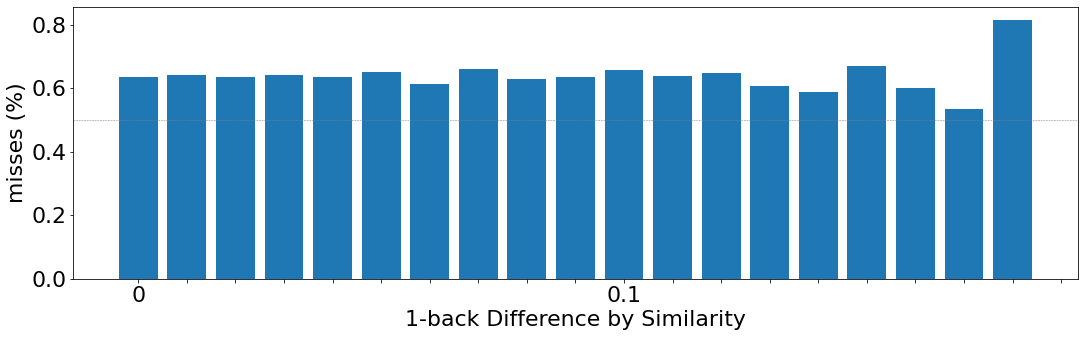

<Figure size 432x288 with 0 Axes>

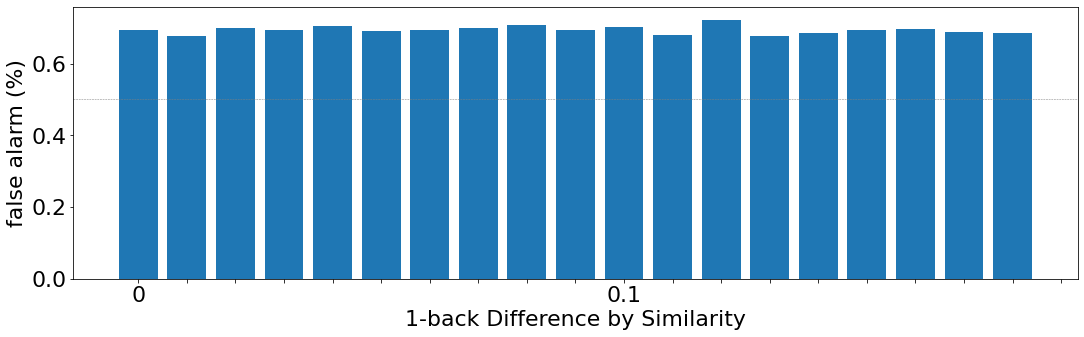

<Figure size 432x288 with 0 Axes>

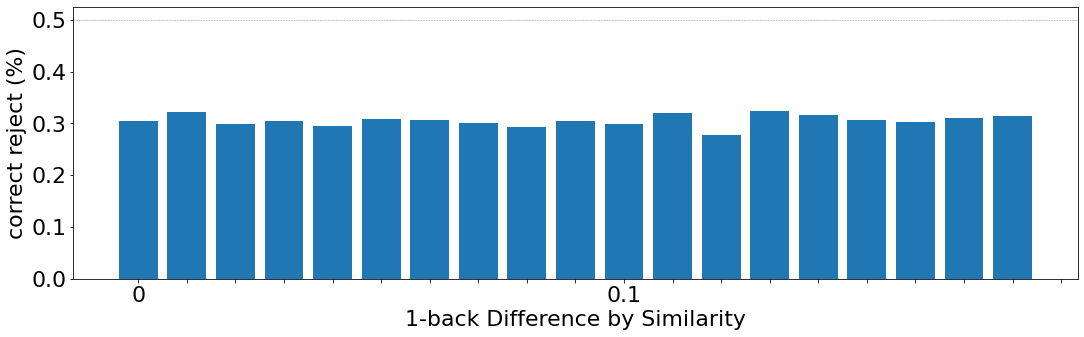

<Figure size 432x288 with 0 Axes>

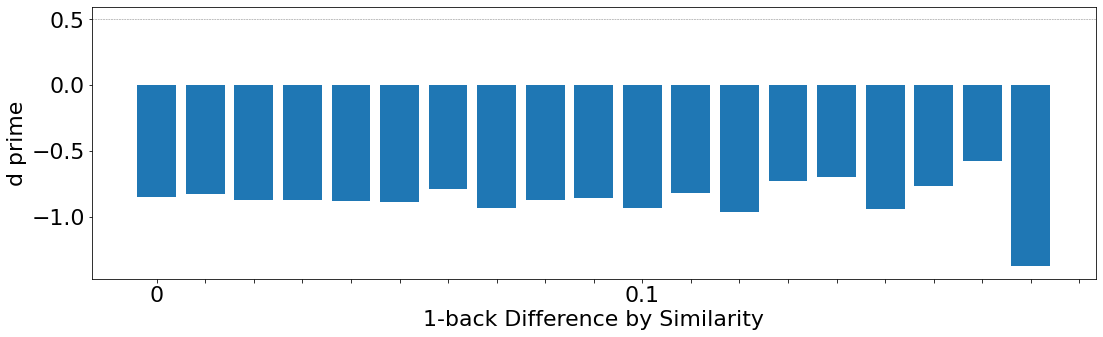

<Figure size 432x288 with 0 Axes>

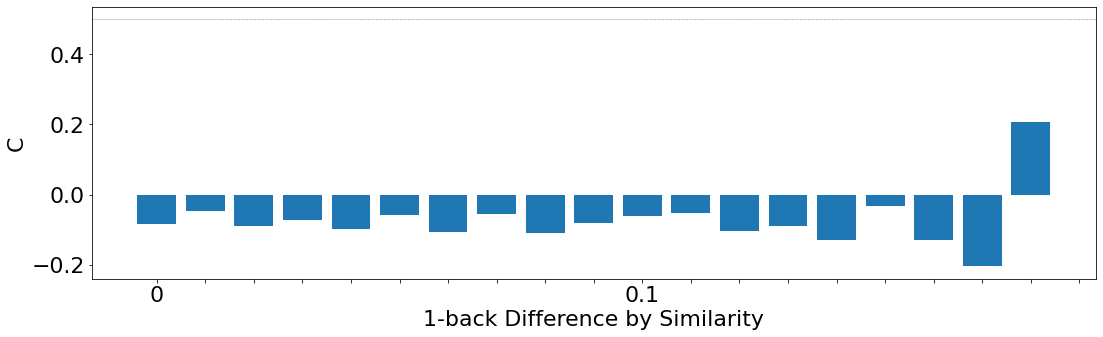

<Figure size 432x288 with 0 Axes>

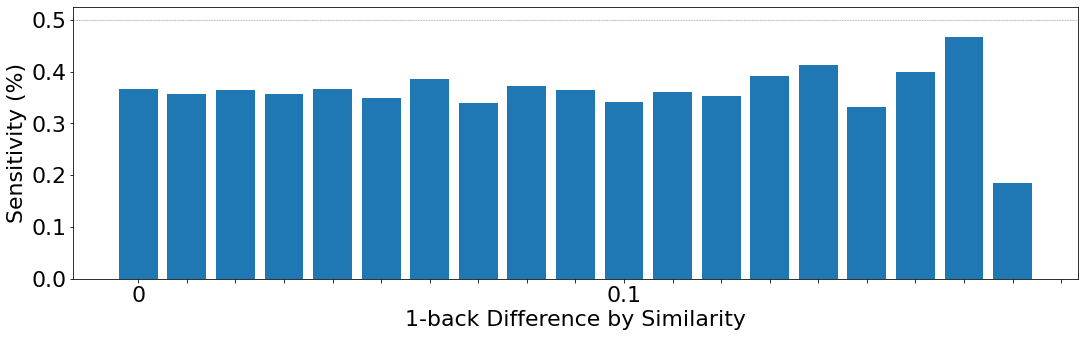

<Figure size 432x288 with 0 Axes>

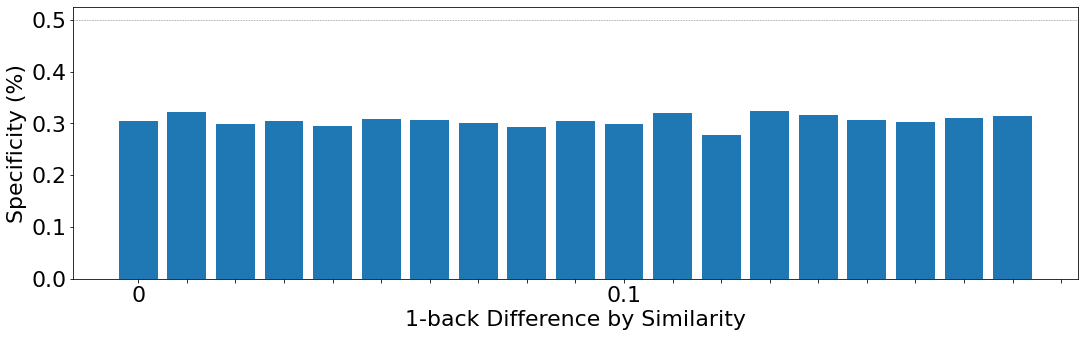

<Figure size 432x288 with 0 Axes>

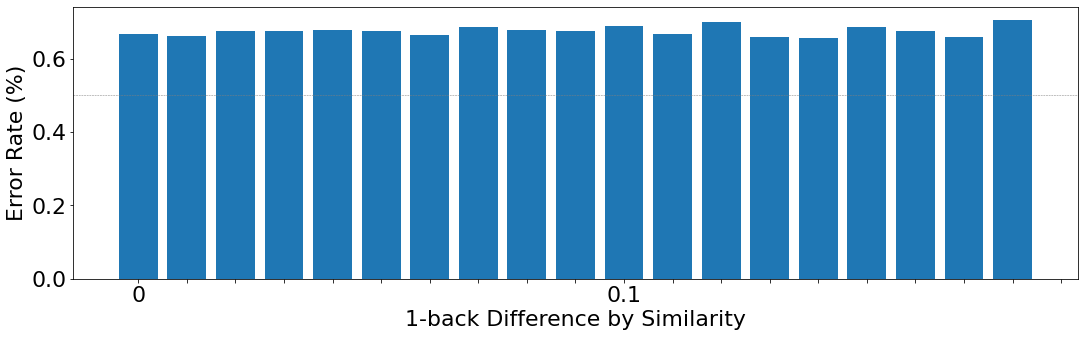

In [18]:
import scipy.stats as stats

hit_1back = []
miss_1back = []
FA_1back = []
CR_1back = []
lengths_1back = []
sensitivity_1back = []
specificity_1back = []
error_rate_1back = []
# balance_rate = []
for start in np.arange(0.3, 0.67, 0.02):
    data_temp = data_Alex_filtered[data_Alex_filtered['similarity_bins_1back'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
    lengths_1back.append(data_temp.shape[0])
    TP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    FP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    FN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    TN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    
    hit_1back.append(TP / (TP + FN))
    FA_1back.append(FP / (FP + TN))
    miss_1back.append(FN / (FN + TP))
    CR_1back.append(TN / (TN + FP))

    sensitivity_1back.append(TP / (TP + FN))
    specificity_1back.append(TN / (TN + FP))
    error_rate_1back.append((FN + FP) / (TP + FN + FP + TN))

# PLOT 1: hits
plt.figure()
y = hit_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1back_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_d = [0 if a != a else a for a in y_1back_d]
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_d)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1back_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1back, FA_1back)]
# y_1back_c = [0 if a != a else a for a in y_1back_c]
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1back_c)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: sensitivity
plt.figure()
y = sensitivity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 10: Specificity
plt.figure()
y = specificity_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 11: Error Rate
plt.figure()
y = error_rate_1back
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

In [15]:
data_Alex.head()

,Unnamed: 0,level_0,Unnamed: 0.1,index,user_id,score,current_labeling_state,response_submitted_at,problem_appeared_at,origin,...,2back_accuracy,3back_accuracy,1forward_accuracy,origin_file,shifted_origin_1back,shifted_origin_file_1back,shifted_origin_1forward,shifted_origin_file_1forward,similarity_1back,similarity_1forward
0,0,3,406213,407796,2,100,gold_standard,2020-09-04 16:34:37.391000+00:00,2020-09-04 16:34:34.810000+00:00,ISIC_0026165.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0027127.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029795.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.2506,0.2958
1,1,4,406215,407798,2,100,gold_standard,2020-09-04 16:34:39.990999+00:00,2020-09-04 16:34:38.653000+00:00,ISIC_0029795.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0026165.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0031663.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.2958,0.3513
2,2,5,406222,407805,2,0,gold_standard,2020-09-04 16:34:48.517999+00:00,2020-09-04 16:34:41.907000+00:00,ISIC_0031663.jpeg,...,0,0,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029795.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0032596.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.3513,0.3477
3,3,6,406225,407808,2,0,gold_standard,2020-09-04 16:34:51.782000+00:00,2020-09-04 16:34:50.275000+00:00,ISIC_0032596.jpeg,...,1,1,1,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0031663.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0029604.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.3477,0.3890
4,4,7,406227,407810,2,0,gold_standard,2020-09-04 16:34:53.345000+00:00,2020-09-04 16:34:52.808000+00:00,ISIC_0029604.jpeg,...,0,0,0,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0032596.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,ISIC_0028175.jpeg,../../../Datasets/ISIC-Archive-Downloader/Data...,0.3890,0.4196


<Figure size 432x288 with 0 Axes>

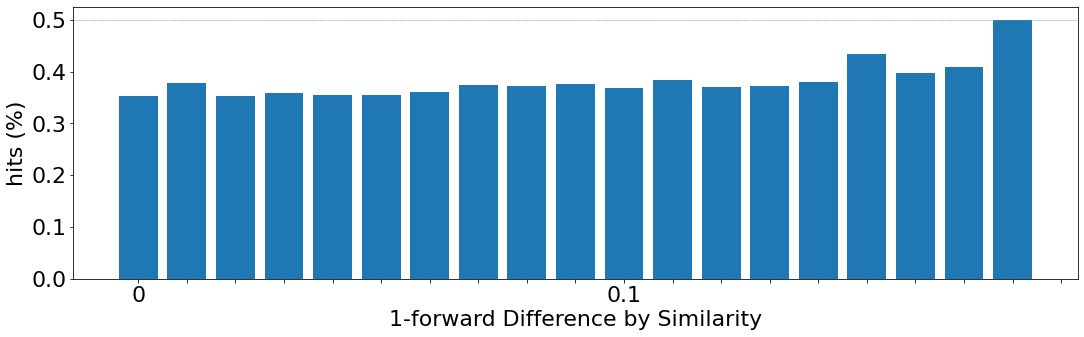

<Figure size 432x288 with 0 Axes>

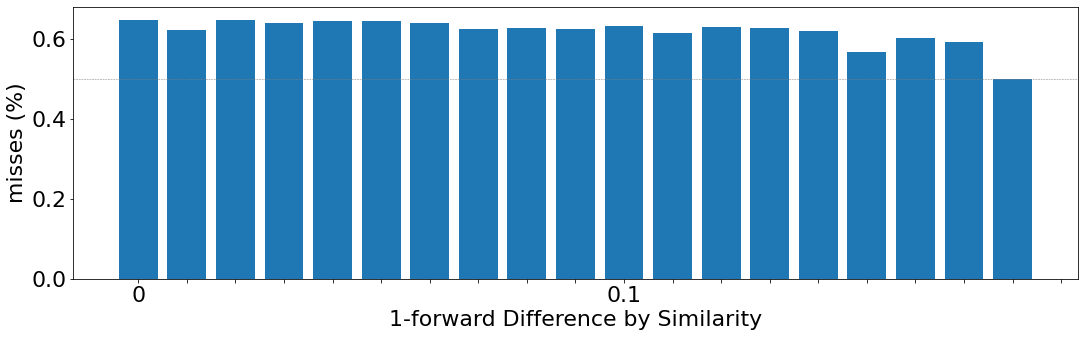

<Figure size 432x288 with 0 Axes>

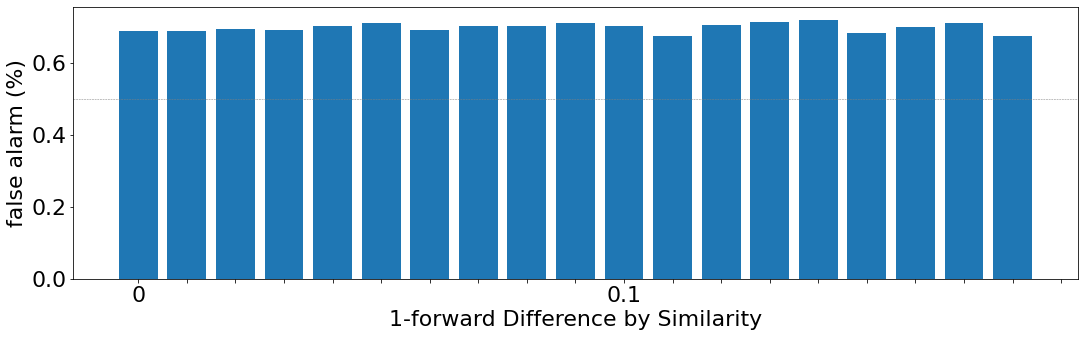

<Figure size 432x288 with 0 Axes>

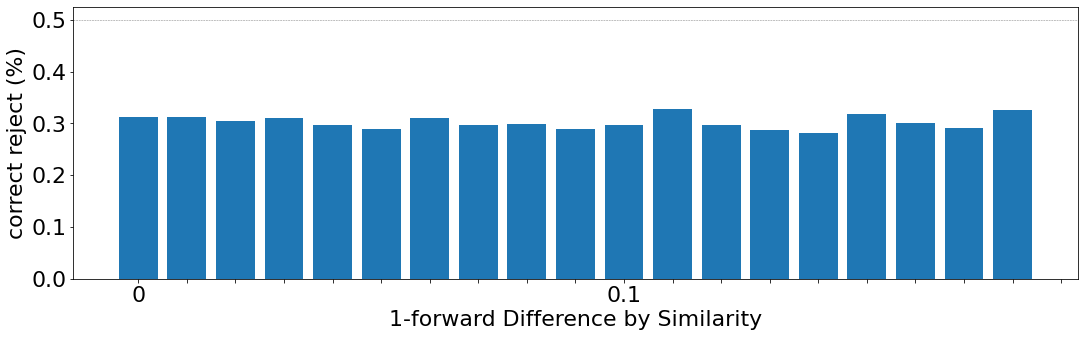

<Figure size 432x288 with 0 Axes>

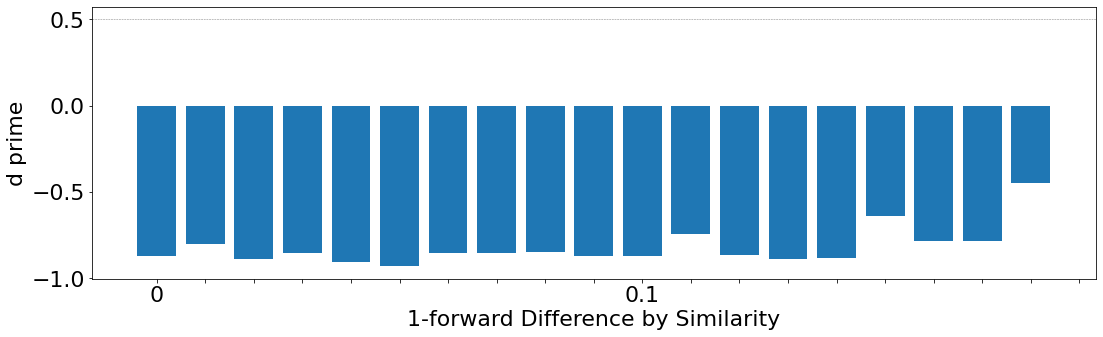

<Figure size 432x288 with 0 Axes>

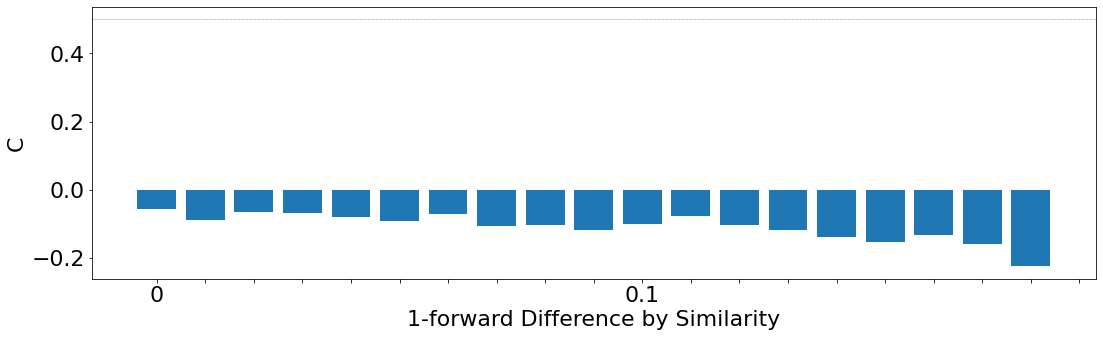

<Figure size 432x288 with 0 Axes>

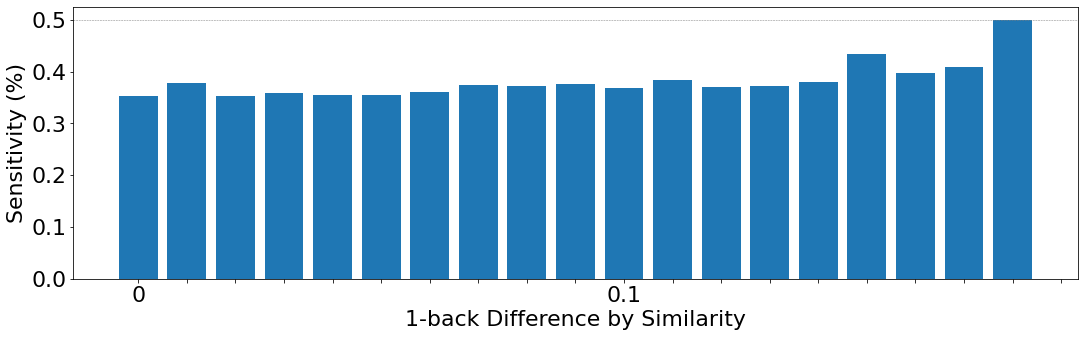

<Figure size 432x288 with 0 Axes>

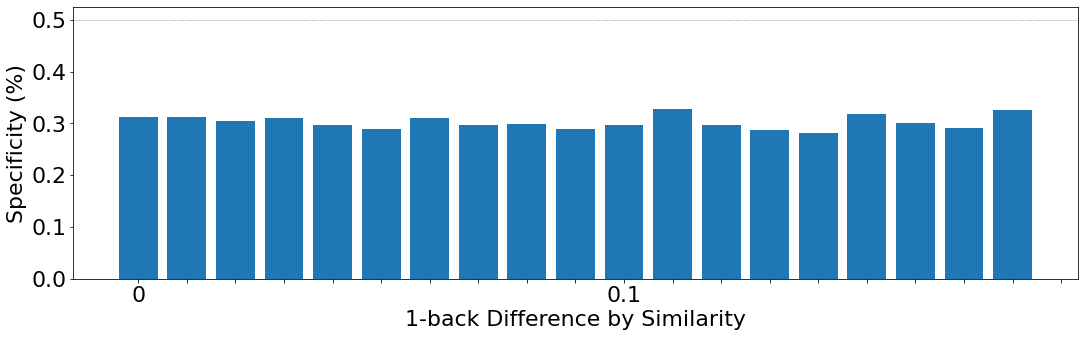

<Figure size 432x288 with 0 Axes>

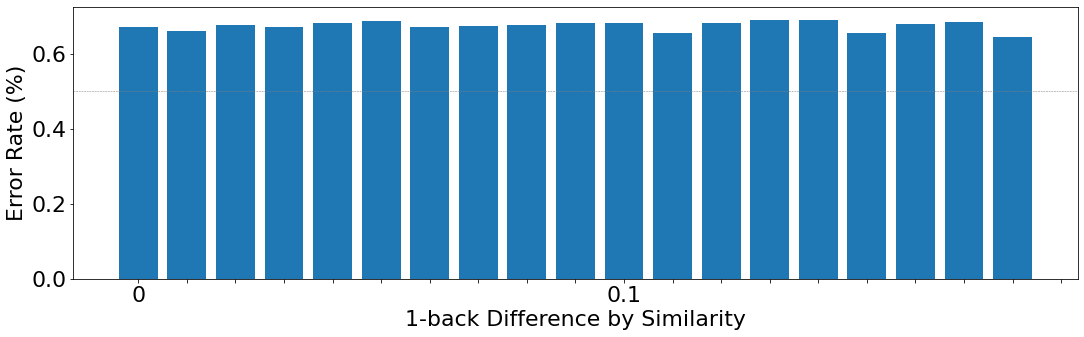

In [20]:
hit_1forward = []
miss_1forward = []
FA_1forward = []
CR_1forward = []
lengths_1forward = []
sensitivity_1forward = []
specificity_1forward = []
error_rate_1forward = []

for start in np.arange(0.3,0.67,0.02):
    data_temp = data_Alex_filtered[data_Alex_filtered['similarity_bins_1forward'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
    lengths_1forward.append(data_temp.shape[0])
    
    TP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    FP = ((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    FN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum()
    TN = ((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum()
    
    hit_1forward.append(TP / (TP + FN))
    FA_1forward.append(FP / (FP + TN))
    miss_1forward.append(FN / (FN + TP))
    CR_1forward.append(TN / (TN + FP))

    sensitivity_1forward.append(TP / (TP + FN))
    specificity_1forward.append(TN / (TN + FP))
    error_rate_1forward.append((FN + FP) / (TP + FN + FP + TN))

# PLOT 1: hits
plt.figure()
y = hit_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('hits (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 2: miss
plt.figure()
y = miss_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('misses (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 3: false alarm
plt.figure()
y = FA_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('false alarm (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 4: correct reject
plt.figure()
y = CR_1forward
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('correct reject (%)')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 5: d'
plt.figure()
y_1forward_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_d = [0 if a != a else a for a in y_1forward_d]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_d)
plt.ylabel('d prime')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 6: C
plt.figure()
y_1forward_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1forward, FA_1forward)]
# y_1forward_c = [0 if a != a else a for a in y_1forward_c]
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y_1forward_c)
plt.ylabel('C')
plt.xlabel('1-forward Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 7: sensitivity
plt.figure()
y = sensitivity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 8: Specificity
plt.figure()
y = specificity_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Specificity (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

# PLOT 9: Error Rate
plt.figure()
y = error_rate_1forward
x = data_per_bin_b.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, y)
plt.ylabel('Error Rate (%)')
plt.xlabel('1-back Difference by Similarity')
#plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')

In [21]:
def running(arr):
    i = 2
    # Initialize an empty list to store cumulative moving
    # averages
    moving_averages = []

    # Store cumulative sums of array in cum_sum array
    cum_sum = np.cumsum(arr);

    item1 = (arr[0]+arr[1])/2
    moving_averages.append(item1)
    
    while i < len(arr):
        item = (arr[i-2] + arr[i-1] + arr[i])/3
        moving_averages.append(item)
        i += 1
    
    item2 = (arr[i-2]+arr[i-1])/2
    moving_averages.append(item2)
    return moving_averages

temp1 = [1,3,5,7,9]
running(temp1)

[2.0, 3.0, 5.0, 7.0, 8.0]

sum of hits:-0.3270804321996881
sum of miss:0.3270804321996881
sum of FA:-0.07177920396597492
sum of CR:0.07177920396597522
sum of sensitivity:-0.3270804321996881
sum of specificity:0.07177920396597522
sum of error rate:0.01311136344715391


<Figure size 432x288 with 0 Axes>

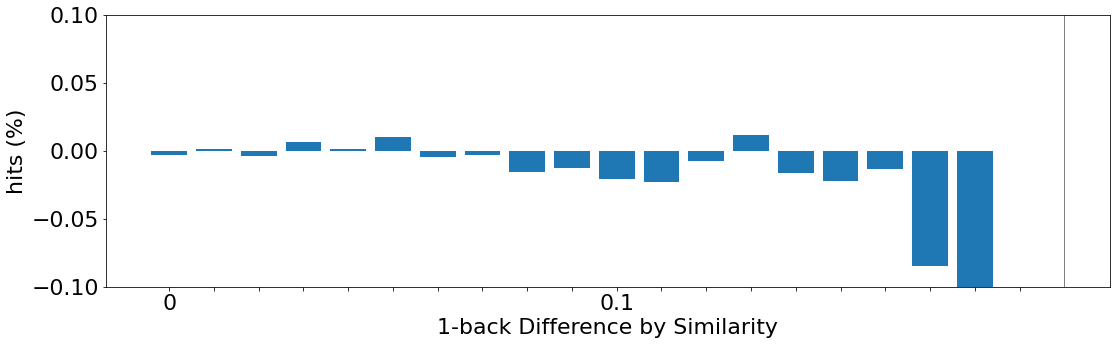

<Figure size 432x288 with 0 Axes>

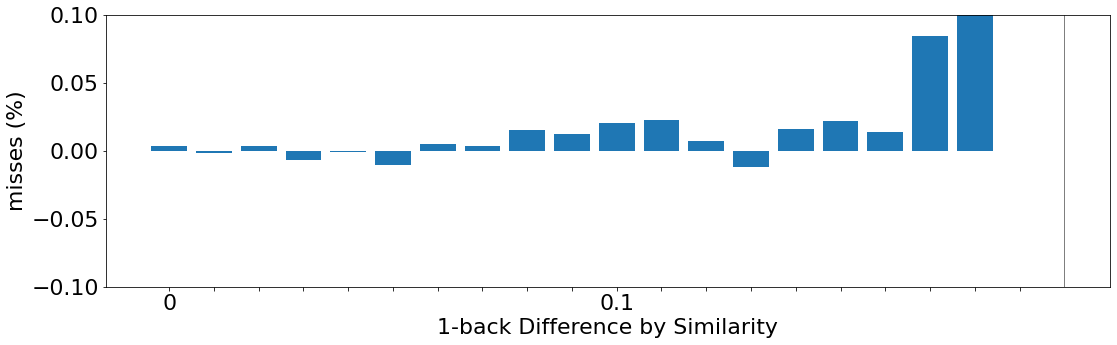

<Figure size 432x288 with 0 Axes>

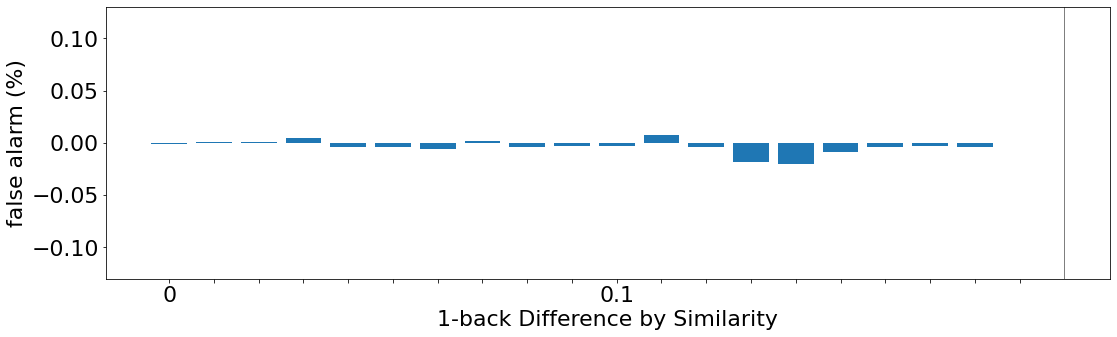

<Figure size 432x288 with 0 Axes>

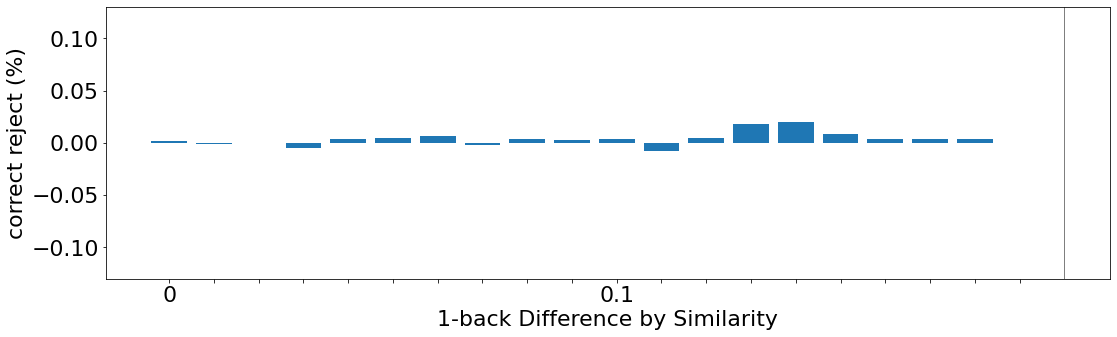

<Figure size 432x288 with 0 Axes>

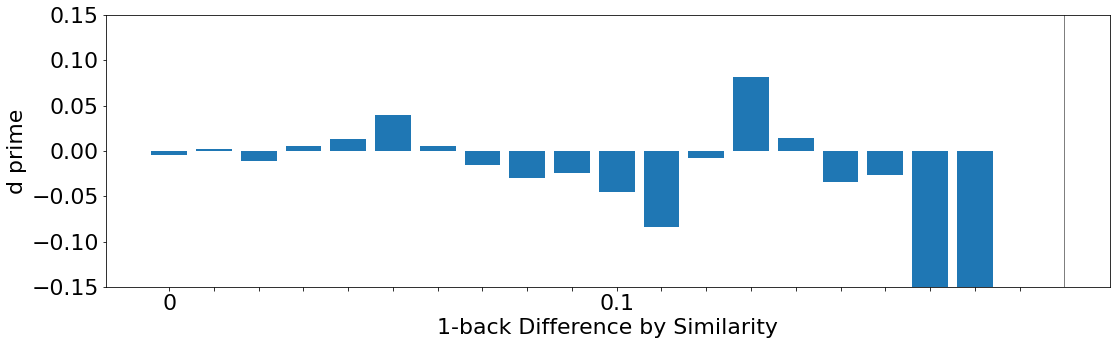

<Figure size 432x288 with 0 Axes>

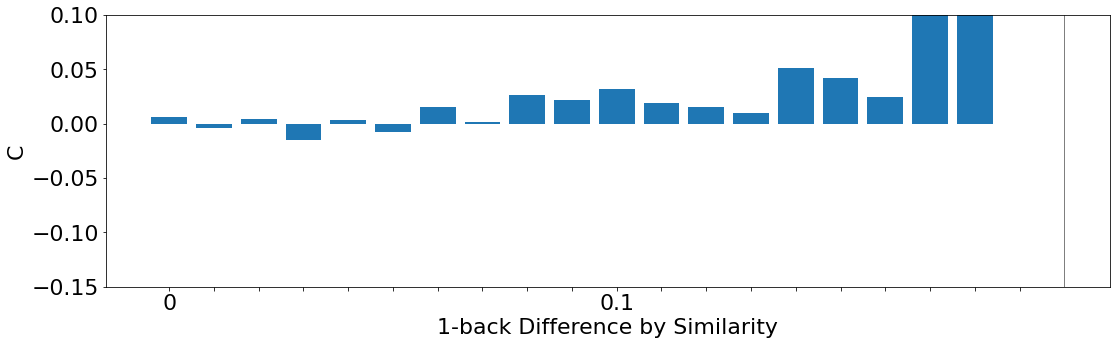

<Figure size 432x288 with 0 Axes>

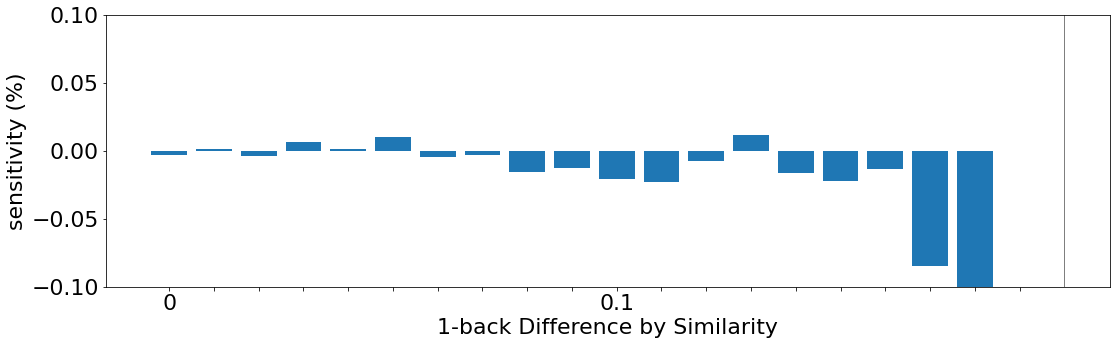

<Figure size 432x288 with 0 Axes>

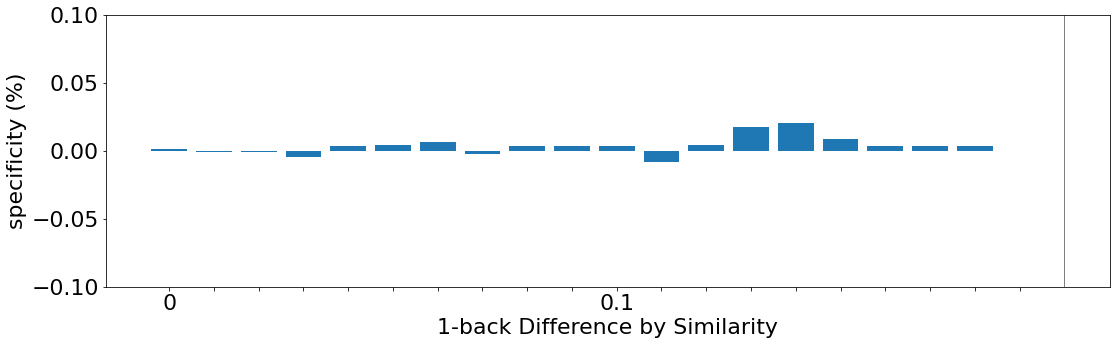

<Figure size 432x288 with 0 Axes>

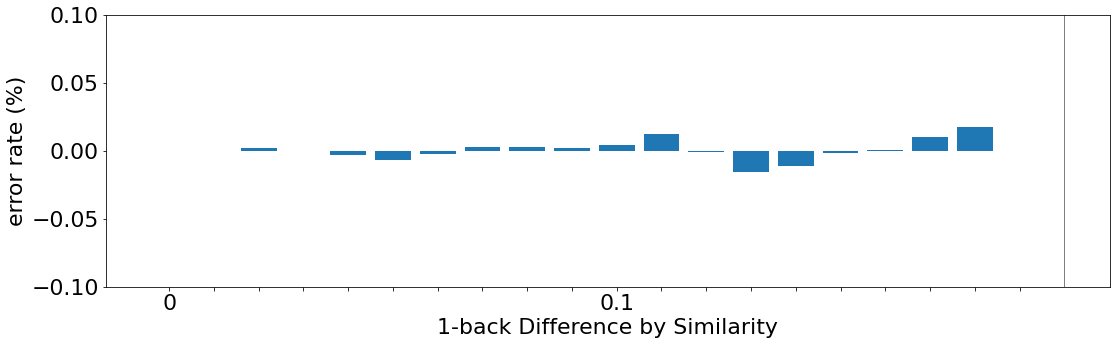

In [25]:
# PLOT 1: hits
plt.figure()
temp = [(a - b) for (a,b) in zip(hit_1back, hit_1forward)]
hit_diff = running(temp)
x = data_per_bin_b.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, hit_diff)
plt.ylabel('hits (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of hits:' + str(sum(hit_diff)))

# PLOT 2: miss
plt.figure()
temp = [(a - b) for (a,b) in zip(miss_1back, miss_1forward)]
miss_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, miss_diff)
plt.ylabel('misses (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of miss:' + str(sum(miss_diff)))

# PLOT 3: false alarm
plt.figure()
temp = [(a - b) for (a,b) in zip(FA_1back, FA_1forward)]
FA_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, FA_diff)
plt.ylabel('false alarm (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.13, 0.13])
print('sum of FA:' + str(sum(FA_diff)))

# PLOT 4: correct reject
plt.figure()
temp = [(a - b) for (a,b) in zip(CR_1back, CR_1forward)]
CR_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, CR_diff)
plt.ylabel('correct reject (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.13, 0.13])
print('sum of CR:' + str(sum(CR_diff)))

# PLOT 5: d'
plt.figure()
temp = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
d_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, d_diff)
plt.ylabel('d prime')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.15, 0.15])

# PLOT 6: C
plt.figure()
temp = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
C_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, C_diff)
plt.ylabel('C')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.15, 0.1])

# PLOT 7: sensitivity
plt.figure()
temp = [a - b for (a,b) in zip(sensitivity_1back, sensitivity_1forward)]
sensitivity_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x))
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, sensitivity_diff)
plt.ylabel('sensitivity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of sensitivity:' + str(sum(sensitivity_diff)))

# PLOT 8: specificity
plt.figure()
temp = [a - b for (a,b) in zip(specificity_1back, specificity_1forward)]
specificity_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, specificity_diff)
plt.ylabel('specificity (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of specificity:' + str(sum(specificity_diff)))

# PLOT 9: error rate
plt.figure()
temp =  [a - b for (a,b) in zip(error_rate_1back, error_rate_1forward)]
error_diff = running(temp)
x = data_per_bin_f.index
y_pos = np.arange(len(x)) 
plt.figure(figsize=(18, 5))
x_labels = ['']*(len(x)+1)
temp = 0
numb = 0
while temp < len(x_labels):
    x_labels[temp] = np.around(numb, decimals=1, out=None)
    temp += 10
    numb += 0.1
plt.xticks(np.arange(len(x)+1),x_labels)
plt.bar(y_pos, error_diff)
plt.ylabel('error rate (%)')
plt.xlabel('1-back Difference by Similarity')
plt.axvline(x=20,linewidth=0.5, color='black')
plt.axhline(y=0.5,linewidth=0.5, color='grey', linestyle='--')
plt.ylim([-0.1, 0.1])
print('sum of error rate:' + str(sum(error_diff)))

In [192]:
import scipy.stats as stats
import random
from tqdm import tqdm

In [235]:
temp = pd.DataFrame(columns = ['0.3, 0.32','0.32, 0.34', '0.34, 0.36','0.36, 0.38', '0.38, 0.40','0.40, 0.42','0.42, 0.44','0.44, 0.46', 
                               '0.46, 0.48','0.48, 0.50', '0.50, 0.52','0.52, 0.54','0.54, 0.56','0.56, 0.58', '0.58, 0.60','0.60, 0.62',
                               '0.62, 0.64','0.64, 0.66','0.66, 0.68'])

p_m_hit = temp.copy(deep=True)
p_m_miss = temp.copy(deep=True)
p_m_FA = temp.copy(deep=True)
p_m_CR = temp.copy(deep=True)
p_m_dprime = temp.copy(deep=True)
p_m_C = temp.copy(deep=True)
p_m_sensitivity = temp.copy(deep=True)
p_m_specificity = temp.copy(deep=True)
p_m_error_rate = temp.copy(deep=True)

num_perm = 1000
for i in tqdm(range(num_perm)):
    temp_data = data_Alex_filtered.copy(deep=True)
    
#     shuffled_1back = temp_data['similarity_1back'].values
#     shuffled_1forward = temp_data['similarity_1forward'].values
    
#     temp = list(zip(shuffled_1back, shuffled_1forward))
#     random.shuffle(temp)
#     shuffled_1back, shuffled_1forward = zip(*temp)
#     # res1 and res2 come out as tuples, and so must be converted to lists.
#     shuffled_1back, shuffled_1forward = list(shuffled_1back), list(shuffled_1forward)
    
#     temp_data['similarity_1back'] = shuffled_1back
#     temp_data['similarity_1forward'] = shuffled_1forward

    temp_data['similarity_1back'] = temp_data['similarity_1back'].sample(frac=1).values
    temp_data['similarity_1forward'] = temp_data['similarity_1forward'].sample(frac=1).values
    
    temp_data['similarity_bins_1back'] = pd.cut(x=temp_data['similarity_1back'], bins=np.arange(0.30, 0.70, 0.04))
    temp_data['similarity_bins_1forward'] = pd.cut(x=temp_data['similarity_1forward'], bins=np.arange(0.30, 0.70, 0.04))
    data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
    data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
    lenth = temp_data.shape[0]

    hit_1back = []
    miss_1back = []
    FA_1back = []
    CR_1back = []
    lengths_1back = []
    num_benign_1back = []
    num_malignant_1back = []
    sensitivity_1back = []
    specificity_1back = []
    error_rate_1back = []
    # balance_rate = []
    for start in np.arange(0.30, 0.67, 0.02):
        data_temp = temp_data[temp_data['similarity_bins_1back'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
        lengths_1back.append(data_temp.shape[0])
        hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
        FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
        miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1back[-1])
        CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1back[-1])
    #     hit_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     FA_1back.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    #     miss_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     CR_1back.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

        num_benign_1back.append(FA_1back[-1] + CR_1back[-1])
        num_malignant_1back.append(hit_1back[-1] + miss_1back[-1])
        sensitivity_1back.append(hit_1back[-1] / (hit_1back[-1] + miss_1back[-1]))
        specificity_1back.append(CR_1back[-1] / (CR_1back[-1] + FA_1back[-1]))
        error_rate_1back.append(1 -(hit_1back[-1] + CR_1back[-1]))
    
        
    hit_1forward = []
    miss_1forward = []
    FA_1forward = []
    CR_1forward = []
    lengths_1forward = []
    sensitivity_1forward = []
    specificity_1forward = []
    error_rate_1forward = []

    num_benign_1forward = []
    num_malignant_1forward = []
    for start in np.arange(0.30, 0.67, 0.02):
        data_temp = temp_data[temp_data['similarity_bins_1forward'] == pd.Interval(np.around(start, decimals=2, out=None), np.around(start + 0.02, decimals=2, out=None), closed='right')]
        lengths_1forward.append(data_temp.shape[0])
        hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
        FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
        miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum() / lengths_1forward[-1])
        CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum() / lengths_1forward[-1])
    #     hit_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     FA_1forward.append(((data_temp['chosen_answer'] == "['melanoma']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())
    #     miss_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['melanoma']")).sum())
    #     CR_1forward.append(((data_temp['chosen_answer'] == "['nevus']") & (data_temp['current_correct_answer'] == "['nevus']")).sum())

        num_benign_1forward.append(FA_1forward[-1] + CR_1forward[-1])
        num_malignant_1forward.append(hit_1forward[-1] + miss_1forward[-1])
        sensitivity_1forward.append(hit_1forward[-1] / (hit_1forward[-1] + miss_1forward[-1]))
        specificity_1forward.append(CR_1forward[-1] / (CR_1forward[-1] + FA_1forward[-1]))
        error_rate_1forward.append(1 -(hit_1forward[-1] + CR_1forward[-1]))
        
    y_1back_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1back, FA_1back)]
    y_1back_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1back, FA_1back)]
    y_1forward_c = [-(stats.norm.ppf(a) + stats.norm.ppf(b))/2 for (a,b) in zip(hit_1forward, FA_1forward)]
    y_1forward_d = [stats.norm.ppf(a) - stats.norm.ppf(b) for (a,b) in zip(hit_1forward, FA_1forward)]
    
    m_hit= [(a - b) / lenth for (a,b) in zip(hit_1back, hit_1forward)]
    m_miss= [(a - b) / lenth for (a,b) in zip(miss_1back, miss_1forward)]
    m_FA = [(a - b) / lenth for (a,b) in zip(FA_1back, FA_1forward)]
    m_CR = [(a - b) / lenth for (a,b) in zip(CR_1back, CR_1forward)]
    m_dprime = [a - b for (a,b) in zip(y_1back_d, y_1forward_d)]
    m_C = [a - b for (a,b) in zip(y_1back_c, y_1forward_c)]
    m_sensitivity = [a - b for (a,b) in zip(sensitivity_1back, sensitivity_1forward)]
    m_specificity = [a - b for (a,b) in zip(specificity_1back, specificity_1forward)]
    m_error_rate = [a - b for (a,b) in zip(error_rate_1back, error_rate_1forward)]
    
    p_m_hit.loc[i] = m_hit
    p_m_miss.loc[i] = m_miss
    p_m_FA.loc[i] = m_FA
    p_m_CR.loc[i] = m_CR
    p_m_dprime.loc[i] = m_dprime
    p_m_C.loc[i] = m_C
    p_m_sensitivity.loc[i] = m_sensitivity
    p_m_specificity.loc[i] = m_specificity
    p_m_error_rate.loc[i] = m_error_rate

  0%|                                                                                                                                                                                    | 0/1000 [00:00<?, ?it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  0%|▌                                                                                                                                                                           | 3/1000 [00:00<03:01,  5.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  1%|█                                                                                                                                                                           | 6/1000 [00:00<02:32,  6.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  1%|█▌                                                                                                                                                                          | 9/1000 [00:01<02:19,  7.10it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  1%|██                                                                                                                                                                         | 12/1000 [00:01<02:13,  7.37it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|██▌                                                                                                                                                                        | 15/1000 [00:02<02:13,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|███                                                                                                                                                                        | 18/1000 [00:02<02:12,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|███▌                                                                                                                                                                       | 21/1000 [00:03<02:11,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  2%|████                                                                                                                                                                       | 24/1000 [00:03<02:11,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  3%|████▌                                                                                                                                                                      | 27/1000 [00:03<02:10,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  3%|█████▏                                                                                                                                                                     | 30/1000 [00:04<02:10,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  3%|█████▋                                                                                                                                                                     | 33/1000 [00:04<02:10,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|██████▏                                                                                                                                                                    | 36/1000 [00:05<02:08,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|██████▋                                                                                                                                                                    | 39/1000 [00:05<02:09,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|███████▏                                                                                                                                                                   | 42/1000 [00:05<02:08,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  4%|███████▋                                                                                                                                                                   | 45/1000 [00:06<02:09,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  5%|████████▏                                                                                                                                                                  | 48/1000 [00:06<02:07,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  5%|████████▋                                                                                                                                                                  | 51/1000 [00:07<02:06,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  5%|█████████▏                                                                                                                                                                 | 54/1000 [00:07<02:06,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  6%|█████████▋                                                                                                                                                                 | 57/1000 [00:07<02:06,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  6%|██████████▎                                                                                                                                                                | 60/1000 [00:08<02:07,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  6%|██████████▊                                                                                                                                                                | 63/1000 [00:08<02:05,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  7%|███████████▎                                                                                                                                                               | 66/1000 [00:09<02:04,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  7%|███████████▊                                                                                                                                                               | 69/1000 [00:09<02:03,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  7%|████████████▎                                                                                                                                                              | 72/1000 [00:09<02:03,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|████████████▊                                                                                                                                                              | 75/1000 [00:10<02:03,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|█████████████▎                                                                                                                                                             | 78/1000 [00:10<02:02,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|█████████████▊                                                                                                                                                             | 81/1000 [00:11<02:02,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  8%|██████████████▎                                                                                                                                                            | 84/1000 [00:11<02:02,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  9%|██████████████▉                                                                                                                                                            | 87/1000 [00:11<02:01,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  9%|███████████████▍                                                                                                                                                           | 90/1000 [00:12<02:01,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

  9%|███████████████▉                                                                                                                                                           | 93/1000 [00:12<02:01,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|████████████████▍                                                                                                                                                          | 96/1000 [00:13<02:01,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|████████████████▉                                                                                                                                                          | 99/1000 [00:13<02:01,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|█████████████████▎                                                                                                                                                        | 102/1000 [00:13<02:00,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 10%|█████████████████▊                                                                                                                                                        | 105/1000 [00:14<01:59,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 11%|██████████████████▎                                                                                                                                                       | 108/1000 [00:14<01:58,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 11%|██████████████████▊                                                                                                                                                       | 111/1000 [00:15<01:58,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 11%|███████████████████▍                                                                                                                                                      | 114/1000 [00:15<01:58,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 12%|███████████████████▉                                                                                                                                                      | 117/1000 [00:15<01:57,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 12%|████████████████████▍                                                                                                                                                     | 120/1000 [00:16<01:57,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 12%|████████████████████▉                                                                                                                                                     | 123/1000 [00:16<01:56,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 13%|█████████████████████▍                                                                                                                                                    | 126/1000 [00:17<01:56,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 13%|█████████████████████▉                                                                                                                                                    | 129/1000 [00:17<01:56,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 13%|██████████████████████▍                                                                                                                                                   | 132/1000 [00:17<01:56,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|██████████████████████▉                                                                                                                                                   | 135/1000 [00:18<01:55,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|███████████████████████▍                                                                                                                                                  | 138/1000 [00:18<01:55,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|███████████████████████▉                                                                                                                                                  | 141/1000 [00:19<01:54,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 14%|████████████████████████▍                                                                                                                                                 | 144/1000 [00:19<01:54,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 15%|████████████████████████▉                                                                                                                                                 | 147/1000 [00:19<01:53,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 15%|█████████████████████████▌                                                                                                                                                | 150/1000 [00:20<01:53,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 15%|██████████████████████████                                                                                                                                                | 153/1000 [00:20<01:53,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|██████████████████████████▌                                                                                                                                               | 156/1000 [00:21<01:52,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|███████████████████████████                                                                                                                                               | 159/1000 [00:21<01:52,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|███████████████████████████▌                                                                                                                                              | 162/1000 [00:21<01:51,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 16%|████████████████████████████                                                                                                                                              | 165/1000 [00:22<01:50,  7.54it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 17%|████████████████████████████▌                                                                                                                                             | 168/1000 [00:22<01:50,  7.54it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 17%|█████████████████████████████                                                                                                                                             | 171/1000 [00:23<01:50,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 17%|█████████████████████████████▌                                                                                                                                            | 174/1000 [00:23<01:49,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 18%|██████████████████████████████                                                                                                                                            | 177/1000 [00:23<01:50,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 18%|██████████████████████████████▌                                                                                                                                           | 180/1000 [00:24<01:49,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 18%|███████████████████████████████                                                                                                                                           | 183/1000 [00:24<01:49,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 19%|███████████████████████████████▌                                                                                                                                          | 186/1000 [00:25<01:48,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 19%|████████████████████████████████▏                                                                                                                                         | 189/1000 [00:25<01:48,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 19%|████████████████████████████████▋                                                                                                                                         | 192/1000 [00:25<01:47,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|█████████████████████████████████▏                                                                                                                                        | 195/1000 [00:26<01:47,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|█████████████████████████████████▋                                                                                                                                        | 198/1000 [00:26<01:46,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|██████████████████████████████████▏                                                                                                                                       | 201/1000 [00:27<01:46,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 20%|██████████████████████████████████▋                                                                                                                                       | 204/1000 [00:27<01:46,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 21%|███████████████████████████████████▏                                                                                                                                      | 207/1000 [00:27<01:45,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 21%|███████████████████████████████████▋                                                                                                                                      | 210/1000 [00:28<01:45,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 21%|████████████████████████████████████▏                                                                                                                                     | 213/1000 [00:28<01:44,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|████████████████████████████████████▋                                                                                                                                     | 216/1000 [00:29<01:44,  7.54it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|█████████████████████████████████████▏                                                                                                                                    | 219/1000 [00:29<01:43,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|█████████████████████████████████████▋                                                                                                                                    | 222/1000 [00:29<01:43,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 22%|██████████████████████████████████████▎                                                                                                                                   | 225/1000 [00:30<01:43,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 23%|██████████████████████████████████████▊                                                                                                                                   | 228/1000 [00:30<01:42,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 23%|███████████████████████████████████████▎                                                                                                                                  | 231/1000 [00:31<01:42,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 23%|███████████████████████████████████████▊                                                                                                                                  | 234/1000 [00:31<01:41,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 24%|████████████████████████████████████████▎                                                                                                                                 | 237/1000 [00:31<01:41,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 24%|████████████████████████████████████████▊                                                                                                                                 | 240/1000 [00:32<01:41,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 24%|█████████████████████████████████████████▎                                                                                                                                | 243/1000 [00:32<01:40,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 25%|█████████████████████████████████████████▊                                                                                                                                | 246/1000 [00:33<01:40,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 25%|██████████████████████████████████████████▎                                                                                                                               | 249/1000 [00:33<01:40,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 25%|██████████████████████████████████████████▊                                                                                                                               | 252/1000 [00:33<01:39,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|███████████████████████████████████████████▎                                                                                                                              | 255/1000 [00:34<01:39,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|███████████████████████████████████████████▊                                                                                                                              | 258/1000 [00:34<01:38,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|████████████████████████████████████████████▎                                                                                                                             | 261/1000 [00:35<01:38,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 26%|████████████████████████████████████████████▉                                                                                                                             | 264/1000 [00:35<01:38,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 27%|█████████████████████████████████████████████▍                                                                                                                            | 267/1000 [00:35<01:37,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 27%|█████████████████████████████████████████████▉                                                                                                                            | 270/1000 [00:36<01:38,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 27%|██████████████████████████████████████████████▍                                                                                                                           | 273/1000 [00:36<01:37,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|██████████████████████████████████████████████▉                                                                                                                           | 276/1000 [00:37<01:36,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|███████████████████████████████████████████████▍                                                                                                                          | 279/1000 [00:37<01:36,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|███████████████████████████████████████████████▉                                                                                                                          | 282/1000 [00:37<01:36,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 28%|████████████████████████████████████████████████▍                                                                                                                         | 285/1000 [00:38<01:36,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 29%|████████████████████████████████████████████████▉                                                                                                                         | 288/1000 [00:38<01:36,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 29%|█████████████████████████████████████████████████▍                                                                                                                        | 291/1000 [00:39<01:35,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 29%|█████████████████████████████████████████████████▉                                                                                                                        | 294/1000 [00:39<01:36,  7.35it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 30%|██████████████████████████████████████████████████▍                                                                                                                       | 297/1000 [00:39<01:35,  7.38it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 30%|███████████████████████████████████████████████████                                                                                                                       | 300/1000 [00:40<01:34,  7.38it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 30%|███████████████████████████████████████████████████▌                                                                                                                      | 303/1000 [00:40<01:34,  7.39it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 31%|████████████████████████████████████████████████████                                                                                                                      | 306/1000 [00:41<01:33,  7.42it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 31%|████████████████████████████████████████████████████▌                                                                                                                     | 309/1000 [00:41<01:33,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 31%|█████████████████████████████████████████████████████                                                                                                                     | 312/1000 [00:41<01:32,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|█████████████████████████████████████████████████████▌                                                                                                                    | 315/1000 [00:42<01:32,  7.42it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|██████████████████████████████████████████████████████                                                                                                                    | 318/1000 [00:42<01:32,  7.39it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|██████████████████████████████████████████████████████▌                                                                                                                   | 321/1000 [00:43<01:31,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 32%|███████████████████████████████████████████████████████                                                                                                                   | 324/1000 [00:43<01:31,  7.40it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 33%|███████████████████████████████████████████████████████▌                                                                                                                  | 327/1000 [00:43<01:30,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 33%|████████████████████████████████████████████████████████                                                                                                                  | 330/1000 [00:44<01:29,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 33%|████████████████████████████████████████████████████████▌                                                                                                                 | 333/1000 [00:44<01:28,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|█████████████████████████████████████████████████████████                                                                                                                 | 336/1000 [00:45<01:28,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|█████████████████████████████████████████████████████████▋                                                                                                                | 339/1000 [00:45<01:28,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|██████████████████████████████████████████████████████████▏                                                                                                               | 342/1000 [00:45<01:27,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 34%|██████████████████████████████████████████████████████████▋                                                                                                               | 345/1000 [00:46<01:27,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 35%|███████████████████████████████████████████████████████████▏                                                                                                              | 348/1000 [00:46<01:26,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 35%|███████████████████████████████████████████████████████████▋                                                                                                              | 351/1000 [00:47<01:26,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 35%|████████████████████████████████████████████████████████████▏                                                                                                             | 354/1000 [00:47<01:25,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 36%|████████████████████████████████████████████████████████████▋                                                                                                             | 357/1000 [00:47<01:25,  7.53it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 36%|█████████████████████████████████████████████████████████████▏                                                                                                            | 360/1000 [00:48<01:25,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 36%|█████████████████████████████████████████████████████████████▋                                                                                                            | 363/1000 [00:48<01:24,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 37%|██████████████████████████████████████████████████████████████▏                                                                                                           | 366/1000 [00:49<01:24,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 37%|██████████████████████████████████████████████████████████████▋                                                                                                           | 369/1000 [00:49<01:24,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 37%|███████████████████████████████████████████████████████████████▏                                                                                                          | 372/1000 [00:49<01:23,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|███████████████████████████████████████████████████████████████▊                                                                                                          | 375/1000 [00:50<01:23,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|████████████████████████████████████████████████████████████████▎                                                                                                         | 378/1000 [00:50<01:22,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|████████████████████████████████████████████████████████████████▊                                                                                                         | 381/1000 [00:51<01:22,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 38%|█████████████████████████████████████████████████████████████████▎                                                                                                        | 384/1000 [00:51<01:22,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 39%|█████████████████████████████████████████████████████████████████▊                                                                                                        | 387/1000 [00:51<01:21,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 39%|██████████████████████████████████████████████████████████████████▎                                                                                                       | 390/1000 [00:52<01:21,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 39%|██████████████████████████████████████████████████████████████████▊                                                                                                       | 393/1000 [00:52<01:21,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|███████████████████████████████████████████████████████████████████▎                                                                                                      | 396/1000 [00:53<01:20,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|███████████████████████████████████████████████████████████████████▊                                                                                                      | 399/1000 [00:53<01:20,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|████████████████████████████████████████████████████████████████████▎                                                                                                     | 402/1000 [00:53<01:20,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 40%|████████████████████████████████████████████████████████████████████▊                                                                                                     | 405/1000 [00:54<01:19,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 41%|█████████████████████████████████████████████████████████████████████▎                                                                                                    | 408/1000 [00:54<01:18,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 41%|█████████████████████████████████████████████████████████████████████▊                                                                                                    | 411/1000 [00:55<01:18,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 41%|██████████████████████████████████████████████████████████████████████▍                                                                                                   | 414/1000 [00:55<01:18,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 42%|██████████████████████████████████████████████████████████████████████▉                                                                                                   | 417/1000 [00:55<01:17,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 42%|███████████████████████████████████████████████████████████████████████▍                                                                                                  | 420/1000 [00:56<01:17,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 42%|███████████████████████████████████████████████████████████████████████▉                                                                                                  | 423/1000 [00:56<01:17,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 43%|████████████████████████████████████████████████████████████████████████▍                                                                                                 | 426/1000 [00:57<01:16,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 43%|████████████████████████████████████████████████████████████████████████▉                                                                                                 | 429/1000 [00:57<01:15,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 43%|█████████████████████████████████████████████████████████████████████████▍                                                                                                | 432/1000 [00:57<01:15,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|█████████████████████████████████████████████████████████████████████████▉                                                                                                | 435/1000 [00:58<01:15,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|██████████████████████████████████████████████████████████████████████████▍                                                                                               | 438/1000 [00:58<01:14,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|██████████████████████████████████████████████████████████████████████████▉                                                                                               | 441/1000 [00:59<01:14,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 44%|███████████████████████████████████████████████████████████████████████████▍                                                                                              | 444/1000 [00:59<01:14,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 45%|███████████████████████████████████████████████████████████████████████████▉                                                                                              | 447/1000 [00:59<01:13,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 45%|████████████████████████████████████████████████████████████████████████████▌                                                                                             | 450/1000 [01:00<01:13,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 45%|█████████████████████████████████████████████████████████████████████████████                                                                                             | 453/1000 [01:00<01:13,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|█████████████████████████████████████████████████████████████████████████████▌                                                                                            | 456/1000 [01:01<01:12,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|██████████████████████████████████████████████████████████████████████████████                                                                                            | 459/1000 [01:01<01:12,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|██████████████████████████████████████████████████████████████████████████████▌                                                                                           | 462/1000 [01:01<01:11,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 46%|███████████████████████████████████████████████████████████████████████████████                                                                                           | 465/1000 [01:02<01:11,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 47%|███████████████████████████████████████████████████████████████████████████████▌                                                                                          | 468/1000 [01:02<01:10,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 47%|████████████████████████████████████████████████████████████████████████████████                                                                                          | 471/1000 [01:03<01:10,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 47%|████████████████████████████████████████████████████████████████████████████████▌                                                                                         | 474/1000 [01:03<01:10,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 48%|█████████████████████████████████████████████████████████████████████████████████                                                                                         | 477/1000 [01:03<01:09,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 48%|█████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 480/1000 [01:04<01:09,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 48%|██████████████████████████████████████████████████████████████████████████████████                                                                                        | 483/1000 [01:04<01:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 49%|██████████████████████████████████████████████████████████████████████████████████▌                                                                                       | 486/1000 [01:05<01:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 49%|███████████████████████████████████████████████████████████████████████████████████▏                                                                                      | 489/1000 [01:05<01:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 49%|███████████████████████████████████████████████████████████████████████████████████▋                                                                                      | 492/1000 [01:05<01:07,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|████████████████████████████████████████████████████████████████████████████████████▏                                                                                     | 495/1000 [01:06<01:07,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|████████████████████████████████████████████████████████████████████████████████████▋                                                                                     | 498/1000 [01:06<01:06,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|█████████████████████████████████████████████████████████████████████████████████████▏                                                                                    | 501/1000 [01:07<01:06,  7.52it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 50%|█████████████████████████████████████████████████████████████████████████████████████▋                                                                                    | 504/1000 [01:07<01:06,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 51%|██████████████████████████████████████████████████████████████████████████████████████▏                                                                                   | 507/1000 [01:07<01:05,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 51%|██████████████████████████████████████████████████████████████████████████████████████▋                                                                                   | 510/1000 [01:08<01:05,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 51%|███████████████████████████████████████████████████████████████████████████████████████▏                                                                                  | 513/1000 [01:08<01:05,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|███████████████████████████████████████████████████████████████████████████████████████▋                                                                                  | 516/1000 [01:09<01:04,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|████████████████████████████████████████████████████████████████████████████████████████▏                                                                                 | 519/1000 [01:09<01:04,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|████████████████████████████████████████████████████████████████████████████████████████▋                                                                                 | 522/1000 [01:09<01:03,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 52%|█████████████████████████████████████████████████████████████████████████████████████████▎                                                                                | 525/1000 [01:10<01:03,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 53%|█████████████████████████████████████████████████████████████████████████████████████████▊                                                                                | 528/1000 [01:10<01:03,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 53%|██████████████████████████████████████████████████████████████████████████████████████████▎                                                                               | 531/1000 [01:11<01:02,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 53%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                               | 534/1000 [01:11<01:02,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 54%|███████████████████████████████████████████████████████████████████████████████████████████▎                                                                              | 537/1000 [01:11<01:01,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 54%|███████████████████████████████████████████████████████████████████████████████████████████▊                                                                              | 540/1000 [01:12<01:01,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 54%|████████████████████████████████████████████████████████████████████████████████████████████▎                                                                             | 543/1000 [01:12<01:01,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 55%|████████████████████████████████████████████████████████████████████████████████████████████▊                                                                             | 546/1000 [01:13<01:00,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 55%|█████████████████████████████████████████████████████████████████████████████████████████████▎                                                                            | 549/1000 [01:13<01:00,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 55%|█████████████████████████████████████████████████████████████████████████████████████████████▊                                                                            | 552/1000 [01:13<00:59,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|██████████████████████████████████████████████████████████████████████████████████████████████▎                                                                           | 555/1000 [01:14<00:59,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|██████████████████████████████████████████████████████████████████████████████████████████████▊                                                                           | 558/1000 [01:14<00:58,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|███████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 561/1000 [01:15<00:58,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 56%|███████████████████████████████████████████████████████████████████████████████████████████████▉                                                                          | 564/1000 [01:15<01:13,  5.91it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 57%|████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                         | 567/1000 [01:16<01:15,  5.75it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 57%|████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                         | 570/1000 [01:16<01:04,  6.72it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                        | 573/1000 [01:17<00:59,  7.22it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|█████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                        | 576/1000 [01:17<00:57,  7.39it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                       | 579/1000 [01:17<00:56,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|██████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                       | 582/1000 [01:18<00:55,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 58%|███████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                      | 585/1000 [01:18<00:55,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 59%|███████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                      | 588/1000 [01:19<00:54,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 591/1000 [01:19<00:54,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 59%|████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                                     | 594/1000 [01:19<00:54,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                                    | 597/1000 [01:20<00:53,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████                                                                    | 600/1000 [01:20<00:53,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 60%|██████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                   | 603/1000 [01:21<00:53,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████                                                                   | 606/1000 [01:21<00:52,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 61%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 609/1000 [01:21<00:52,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 61%|████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                  | 612/1000 [01:22<00:51,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                 | 615/1000 [01:22<00:51,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 618/1000 [01:23<00:50,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                | 621/1000 [01:23<00:50,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 62%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                | 624/1000 [01:23<00:50,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 63%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                               | 627/1000 [01:24<00:49,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                               | 630/1000 [01:24<00:49,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 63%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                              | 633/1000 [01:25<00:48,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                              | 636/1000 [01:25<00:48,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                             | 639/1000 [01:25<00:48,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                            | 642/1000 [01:26<00:47,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 64%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                            | 645/1000 [01:26<00:47,  7.43it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                           | 648/1000 [01:27<00:47,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 65%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                           | 651/1000 [01:27<00:46,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 65%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                          | 654/1000 [01:27<00:46,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 66%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                          | 657/1000 [01:28<00:45,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                         | 660/1000 [01:28<00:45,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 66%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                         | 663/1000 [01:29<00:45,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                        | 666/1000 [01:29<00:44,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 67%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 669/1000 [01:29<00:44,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                                       | 672/1000 [01:30<00:43,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 675/1000 [01:30<00:43,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                      | 678/1000 [01:31<00:43,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                      | 681/1000 [01:31<00:42,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                     | 684/1000 [01:31<00:42,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                     | 687/1000 [01:32<00:41,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                    | 690/1000 [01:32<00:41,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 69%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                    | 693/1000 [01:33<00:40,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                   | 696/1000 [01:33<00:40,  7.51it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                   | 699/1000 [01:33<00:40,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                  | 702/1000 [01:34<00:39,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 70%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                  | 705/1000 [01:34<00:39,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                 | 708/1000 [01:35<00:38,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 71%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                 | 711/1000 [01:35<00:38,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 71%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                                | 714/1000 [01:35<00:38,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 72%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                | 717/1000 [01:36<00:37,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                               | 720/1000 [01:36<00:37,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 72%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                               | 723/1000 [01:37<00:36,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                              | 726/1000 [01:37<00:36,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 73%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                              | 729/1000 [01:37<00:36,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                             | 732/1000 [01:38<00:35,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                             | 735/1000 [01:38<00:35,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                            | 738/1000 [01:39<00:34,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                            | 741/1000 [01:39<00:34,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                                           | 744/1000 [01:39<00:34,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                           | 747/1000 [01:40<00:33,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 75%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                          | 750/1000 [01:40<00:33,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 75%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                          | 753/1000 [01:41<00:33,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                         | 756/1000 [01:41<00:32,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                         | 759/1000 [01:41<00:32,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                        | 762/1000 [01:42<00:31,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 76%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                        | 765/1000 [01:42<00:31,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 77%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 768/1000 [01:43<00:31,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 771/1000 [01:43<00:30,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 77%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                      | 774/1000 [01:43<00:30,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 777/1000 [01:44<00:29,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                     | 780/1000 [01:44<00:29,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 78%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                     | 783/1000 [01:45<00:29,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 79%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                    | 786/1000 [01:45<00:28,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                   | 789/1000 [01:45<00:28,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 79%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                   | 792/1000 [01:46<00:27,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                  | 795/1000 [01:46<00:27,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                  | 798/1000 [01:47<00:26,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                 | 801/1000 [01:47<00:26,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                 | 804/1000 [01:47<00:26,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                | 807/1000 [01:48<00:25,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                | 810/1000 [01:48<00:25,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 81%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                               | 813/1000 [01:49<00:25,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                               | 816/1000 [01:49<00:24,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                              | 819/1000 [01:49<00:24,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                              | 822/1000 [01:50<00:23,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 82%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                             | 825/1000 [01:50<00:23,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 83%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 828/1000 [01:51<00:23,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                            | 831/1000 [01:51<00:22,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                            | 834/1000 [01:51<00:22,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                           | 837/1000 [01:52<00:21,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 84%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                           | 840/1000 [01:52<00:21,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 84%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                          | 843/1000 [01:53<00:21,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 85%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                          | 846/1000 [01:53<00:20,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                         | 849/1000 [01:53<00:20,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 852/1000 [01:54<00:19,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                        | 855/1000 [01:54<00:19,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                        | 858/1000 [01:55<00:18,  7.50it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                       | 861/1000 [01:55<00:18,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 86%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                       | 864/1000 [01:55<00:18,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                      | 867/1000 [01:56<00:17,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 87%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                      | 870/1000 [01:56<00:17,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 87%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                     | 873/1000 [01:57<00:17,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                     | 876/1000 [01:57<00:16,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                    | 879/1000 [01:57<00:16,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                    | 882/1000 [01:58<00:15,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                   | 885/1000 [01:58<00:15,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 89%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                   | 888/1000 [01:59<00:14,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                  | 891/1000 [01:59<00:14,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 89%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                  | 894/1000 [01:59<00:14,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                 | 897/1000 [02:00<00:13,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                 | 900/1000 [02:00<00:13,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 90%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                | 903/1000 [02:01<00:13,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                | 906/1000 [02:01<00:12,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 91%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌               | 909/1000 [02:01<00:12,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████               | 912/1000 [02:02<00:11,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌              | 915/1000 [02:02<00:11,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████              | 918/1000 [02:03<00:10,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌             | 921/1000 [02:03<00:10,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 924/1000 [02:03<00:10,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌            | 927/1000 [02:04<00:09,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████            | 930/1000 [02:04<00:09,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌           | 933/1000 [02:05<00:08,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████           | 936/1000 [02:05<00:08,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋          | 939/1000 [02:05<00:08,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 942/1000 [02:06<00:07,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋         | 945/1000 [02:06<00:07,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 948/1000 [02:07<00:06,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋        | 951/1000 [02:07<00:06,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 954/1000 [02:07<00:06,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋       | 957/1000 [02:08<00:05,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏      | 960/1000 [02:08<00:05,  7.44it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋      | 963/1000 [02:09<00:04,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 966/1000 [02:09<00:04,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 969/1000 [02:10<00:04,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 972/1000 [02:10<00:03,  7.46it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 975/1000 [02:10<00:03,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 978/1000 [02:11<00:02,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 981/1000 [02:11<00:02,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 984/1000 [02:12<00:02,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 987/1000 [02:12<00:01,  7.41it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎ | 990/1000 [02:12<00:01,  7.45it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 993/1000 [02:13<00:00,  7.48it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 996/1000 [02:13<00:00,  7.49it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 999/1000 [02:14<00:00,  7.47it/s]/tmp/ipykernel_23077/2054246059.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_b = temp_data.groupby(['similarity_bins_1back']).mean()
/tmp/ipykernel_23077/2054246059.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_per_bin_f = temp_data.groupby(['similarity_bins_1forward']).mean()
/tmp/ipykernel_23077/2054246059.py:54: RuntimeWarning: invalid value encountered in long_scal

In [ ]:
num_bars = 9
num_perm = 1000

hit_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_hit.iloc[j,i] > hit_diff[i]:
            hit_check[i] += 1
#     if hit_check[i] > num_perm / 2:
#         hit_check[i] = num_perm - hit_check[i]
        
hit_check = hit_check / num_perm
print(hit_check)

miss_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_miss.iloc[j,i] > miss_diff[i]:
            miss_check[i] += 1
#     if miss_check[i] > num_perm / 2:
#         miss_check[i] = num_perm - miss_check[i]
        
miss_check = miss_check / num_perm
print(miss_check)

FA_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_FA.iloc[j,i] > FA_diff[i]:
            FA_check[i] += 1
#     if FA_check[i] > num_perm / 2:
#         FA_check[i] = num_perm - FA_check[i]
        
FA_check = FA_check / num_perm
print(FA_check)

CR_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_CR.iloc[j,i] > CR_diff[i]:
            CR_check[i] += 1
#     if CR_check[i] > num_perm / 2:
#         CR_check[i] = num_perm - CR_check[i]
        
CR_check = CR_check / num_perm
print(CR_check)

d_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_dprime.iloc[j,i] > d_diff[i]:
            d_check[i] += 1
#     if d_check[i] > num_perm / 2:
#         d_check[i] = num_perm - d_check[i]
        
d_check = d_check / num_perm
print(d_check)

C_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_C.iloc[j,i] > C_diff[i]:
            C_check[i] += 1
#     if C_check[i] > num_perm / 2:
#         C_check[i] = num_perm - C_check[i]
        
C_check = C_check / num_perm
print(C_check)

sensitivity_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_sensitivity.iloc[j,i] > sensitivity_diff[i]:
            sensitivity_check[i] += 1
#     if sensitivity_check[i] > num_perm / 2:
#         sensitivity_check[i] = num_perm - sensitivity_check[i]
        
sensitivity_check = sensitivity_check / num_perm
print(sensitivity_check)

specificity_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_specificity.iloc[j,i] > specificity_diff[i]:
            specificity_check[i] += 1
#     if specificity_check[i] > num_perm / 2:
#         specificity_check[i] = num_perm - specificity_check[i]
        
specificity_check = specificity_check / num_perm
print(specificity_check)

error_check = np.zeros(num_bars,)
for i in range(num_bars):
    for j in range(num_perm):
        if p_m_error_rate.iloc[j,i] > error_diff[i]:
            error_check[i] += 1
#     if error_check[i] > num_perm / 2:
#         error_check[i] = num_perm - error_check[i]
        
error_check = error_check / num_perm
print(error_check)
